<a href="https://colab.research.google.com/github/bushra-rafia/Bangla-Chatbot/blob/master/bidirectional_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading the clean dataset
df= pd.read_csv("/content/drive/MyDrive/CSE715-Project Group 6/Codebase/dataset/cleaned_dataset.csv")

In [ ]:
df.head()

,Queries,Response
0,হাই,শুরু হাই কেমন চলছে শেষ
1,আমি ভালো আছি তোমার কি অবস্থা,শুরু আমি অনেক ভালো জিজ্ঞাসা করার জন্য ধন্যবাদ শেষ
2,আমি অনেক ভালো জিজ্ঞাসা করার জন্য ধন্যবাদ,শুরু সমস্যা নেই তারপর কেমন ছিলে শেষ
3,সমস্যা নেই তারপর কেমন ছিলে,শুরু আমি বেশ ভাল ছিলাম তোমার খবর কি শেষ
4,আমি বেশ ভাল ছিলাম তোমার খবর কি,শুরু আমি ভালোই আছি আমি এখন স্কুলে আছি শেষ


In [ ]:
df.tail()

,Queries,Response
1258,তারা আপনাকে আবার চিৎকার করবে,শুরু চিৎকার কোন ভাল কাজ করে না শেষ
1259,চিৎকার কোন ভাল কাজ করে না,শুরু আপনি কি এই ফর্মটা দেখবেন শেষ
1260,আপনি কি এই ফর্মটা দেখবেন,শুরু এতে কি আপনার কোনো সমস্যা হচ্ছে শেষ
1261,এতে কি আপনার কোনো সমস্যা হচ্ছে,শুরু আমি কিছু জিনিস বুঝতে পারছি না শেষ
1262,আমি কিছু জিনিস বুঝতে পারছি না,শুরু বুঝিয়ে দিচ্ছি সমস্যা নেই শেষ


**Tokenization**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
def tokenize_sent(text):
  '''
  Take list on texts as input and
  returns its tokenizer and enocded text
  '''
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text)

  return tokenizer, tokenizer.texts_to_sequences(text)

In [ ]:
# get in one list
queries = df.Queries.astype(str).to_list()
response = df.Response.astype(str).to_list()

In [ ]:
ques_tokenizer, ques_encoded= tokenize_sent(text= queries)
ans_tokenizer, ans_encoded= tokenize_sent(text= response)

In [ ]:
len(ques_encoded)
len(ans_encoded)

1263

In [ ]:
ques_encoded[100:105]

[[1, 52, 274, 11],
 [35, 1, 90, 11, 15, 23, 92, 741, 10, 41],
 [1, 75, 1, 12, 194, 26, 107],
 [33, 3, 156, 17, 349, 84, 12, 742],
 [7, 34, 344, 101, 476, 225, 262, 123, 743, 744]]

In [ ]:
ans_encoded[1500:1505]

[]

In [ ]:
ques_index_word = ques_tokenizer.index_word
print({key: ques_index_word[key] for key in list(ques_index_word.keys())[:10]})

{1: 'আমি', 2: 'কি', 3: 'আপনি', 4: 'এটা', 5: 'না', 6: 'আমার', 7: 'তুমি', 8: 'আপনার', 9: 'একটি', 10: 'হবে'}


In [ ]:
print(ques_tokenizer.word_counts)
# total unique words in question
print(len(ques_tokenizer.word_counts))

OrderedDict([('হাই', 4), ('আমি', 454), ('ভালো', 30), ('আছি', 6), ('তোমার', 35), ('কি', 227), ('অবস্থা', 7), ('অনেক', 33), ('জিজ্ঞাসা', 4), ('করার', 12), ('জন্য', 36), ('ধন্যবাদ', 19), ('সমস্যা', 8), ('নেই', 16), ('তারপর', 4), ('কেমন', 19), ('ছিলে', 2), ('বেশ', 12), ('ভাল', 34), ('ছিলাম', 7), ('খবর', 9), ('ভালোই', 1), ('এখন', 12), ('স্কুলে', 30), ('তুমি', 91), ('যাও', 3), ('হ্যাঁ', 49), ('যাই।', 2), ('সেখানে', 13), ('পছন্দ', 33), ('করো', 4), ('এটা', 169), ('বড়', 10), ('ক্যাম্পাস', 1), ('স্কুলের', 2), ('শুভকামনা।', 1), ('চলছে', 2), ('কী', 18), ('ধন্যবাদ।', 3), ('তো', 3), ('ইদানীং', 7), ('আছো', 3), ('আসলে', 6), ('ছিলাম।', 11), ('আপনি', 176), ('আছি।', 1), ('কোন', 30), ('পড়েন', 1), ('বাংলা', 1), ('পড়ছি', 1), ('লাগছে', 3), ('খারাপ', 13), ('না', 126), ('মানুষ', 8), ('আছে।', 7), ('সৌভাগ্য', 1), ('কামনা', 1), ('করছি', 18), ('আজ', 31), ('বোধ', 5), ('করছেন', 11), ('খুব', 31), ('একেবারে', 4), ('আপনাকে', 27), ('আপনার', 74), ('দিনকাল', 1), ('যাচ্ছে', 4), ('সম্প্রতি', 3), ('স্কুল', 5), ('শুরু', 16)

In [ ]:
QUES_VOCAB_SIZE = len(ques_tokenizer.word_counts) + 1
QUES_VOCAB_SIZE

1478

In [ ]:
ans_index_word= ans_tokenizer.index_word
print({key: ans_index_word[key] for key in list(ans_index_word.keys())[:10]})

{1: 'শুরু', 2: 'শেষ', 3: 'আমি', 4: 'কি', 5: 'আপনি', 6: 'এটা', 7: 'না', 8: 'আমার', 9: 'তুমি', 10: 'আপনার'}


In [ ]:
ans_word_index =ans_tokenizer.word_index
print({key: ans_word_index[key] for key in list(ans_word_index.keys())[:10]})

{'শুরু': 1, 'শেষ': 2, 'আমি': 3, 'কি': 4, 'আপনি': 5, 'এটা': 6, 'না': 7, 'আমার': 8, 'তুমি': 9, 'আপনার': 10}


In [ ]:
print(ans_tokenizer.word_counts)
# total unique words in answer
print(len(ans_tokenizer.word_counts))

OrderedDict([('শুরু', 1279), ('হাই', 4), ('কেমন', 20), ('চলছে', 3), ('শেষ', 1267), ('আমি', 453), ('অনেক', 33), ('ভালো', 29), ('জিজ্ঞাসা', 4), ('করার', 12), ('জন্য', 36), ('ধন্যবাদ', 19), ('সমস্যা', 9), ('নেই', 17), ('তারপর', 4), ('ছিলে', 2), ('বেশ', 12), ('ভাল', 34), ('ছিলাম', 7), ('তোমার', 34), ('খবর', 9), ('কি', 226), ('ভালোই', 1), ('আছি', 5), ('এখন', 12), ('স্কুলে', 30), ('তুমি', 91), ('যাও', 3), ('হ্যাঁ', 49), ('যাই।', 2), ('সেখানে', 13), ('পছন্দ', 33), ('করো', 4), ('এটা', 169), ('বড়', 10), ('ক্যাম্পাস', 1), ('স্কুলের', 2), ('শুভকামনা।', 1), ('কী', 18), ('অবস্থা', 6), ('ধন্যবাদ।', 3), ('তো', 3), ('ইদানীং', 7), ('আছো', 3), ('আসলে', 6), ('ছিলাম।', 11), ('আপনি', 176), ('আছি।', 1), ('কোন', 30), ('পড়েন', 1), ('বাংলা', 1), ('পড়ছি', 1), ('লাগছে', 3), ('খারাপ', 13), ('না', 126), ('মানুষ', 8), ('আছে।', 7), ('সৌভাগ্য', 1), ('কামনা', 1), ('করছি', 18), ('আজ', 31), ('বোধ', 5), ('করছেন', 11), ('খুব', 31), ('একেবারে', 4), ('আপনাকে', 27), ('আপনার', 74), ('দিনকাল', 1), ('যাচ্ছে', 4), ('সম্প্রতি',

In [ ]:
ANS_VOCAB_SIZE=len(ans_tokenizer.word_counts) + 1
ANS_VOCAB_SIZE

1480

In [ ]:
# find max ques and ans length
max_ques_len = 0
for i in range(len(ques_encoded)):
  if len(ques_encoded[i]) > max_ques_len:
    max_ques_len= len(ques_encoded[i])

max_ans_len = 0
for i in range(len(ans_encoded)):
  if len(ans_encoded[i]) > max_ans_len:
    max_ans_len= len(ans_encoded[i])


In [ ]:
max_ans_len

17

In [ ]:
max_ques_len

15

**Padding**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Use max length for padding for ques and ans
ques_padded = pad_sequences(ques_encoded, maxlen=max_ques_len, padding='post')
ans_padded = pad_sequences(ans_encoded, maxlen=max_ans_len, padding='post')

In [ ]:
ans_padded

array([[   1,  261,   59, ...,    0,    0,    0],
       [   1,    3,   39, ...,    0,    0,    0],
       [   1,  130,   69, ...,    0,    0,    0],
       ...,
       [   1,  255,    4, ...,    0,    0,    0],
       [   1,    3,   23, ...,    0,    0,    0],
       [   1, 1478, 1479, ...,    0,    0,    0]], dtype=int32)

In [ ]:
ques_padded

array([[260,   0,   0, ...,   0,   0,   0],
       [  1,  43, 187, ...,   0,   0,   0],
       [  1,  37,  43, ...,   0,   0,   0],
       ...,
       [  3,   2,  23, ...,   0,   0,   0],
       [254,   2,   8, ...,   0,   0,   0],
       [  1,  21, 205, ...,   0,   0,   0]], dtype=int32)

In [ ]:
ques_padded.shape

(1263, 15)

In [ ]:
ans_padded.shape

(1263, 17)

In [ ]:
type(ans_padded)

numpy.ndarray

**Split into train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ques_padded, ans_padded, test_size=0.20, random_state= 55, shuffle =True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# , X_val.shape, y_val.shape

((1136, 15), (127, 15), (1136, 17), (127, 17))

**Model**

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, Bidirectional, Add, Concatenate, Dropout
from tensorflow.keras import Input, Model

In [ ]:
# from keras.regularizers import l2  # Use any regularizer from keras.regularizers that fits your needs
# # Define hyperparameters
# embedding_regularizer = l2(0.01)

In [ ]:
# Eoncoder
encoder_input = Input(shape=(None, ))
encoder_embd = Embedding(QUES_VOCAB_SIZE,512, mask_zero=True)(encoder_input)
encoder_lstm = Bidirectional(LSTM(256, return_state=True))
encoder_output, forw_state_h, forw_state_c, back_state_h, back_state_c = encoder_lstm(encoder_embd)
state_h_final = Concatenate()([forw_state_h, back_state_h])
state_c_final = Concatenate()([forw_state_c, back_state_c])

# Now take only states and create context vector
encoder_states= [state_h_final, state_c_final]

# Decoder
decoder_input = Input(shape=(None,))
# For zero padding we have added +1 in marathi vocab size
decoder_embd = Embedding(ANS_VOCAB_SIZE, 512, mask_zero=True)
decoder_embedding= decoder_embd(decoder_input)
# We used bidirectional layer above so we have to double units of this lstm
decoder_lstm = LSTM(512, return_state=True,return_sequences=True )
# just take output of this decoder dont need self states
decoder_outputs, _, _= decoder_lstm(decoder_embedding, initial_state=encoder_states)
# here this is going to predicct so we can add dense layer here
# here we want to convert predicted numbers into probability so use softmax
decoder_dense= Dense(ANS_VOCAB_SIZE, activation='softmax')
# We will again feed predicted output into decoder to predict its next word
decoder_outputs = decoder_dense(decoder_outputs)

model5 = Model([encoder_input, decoder_input], decoder_outputs)

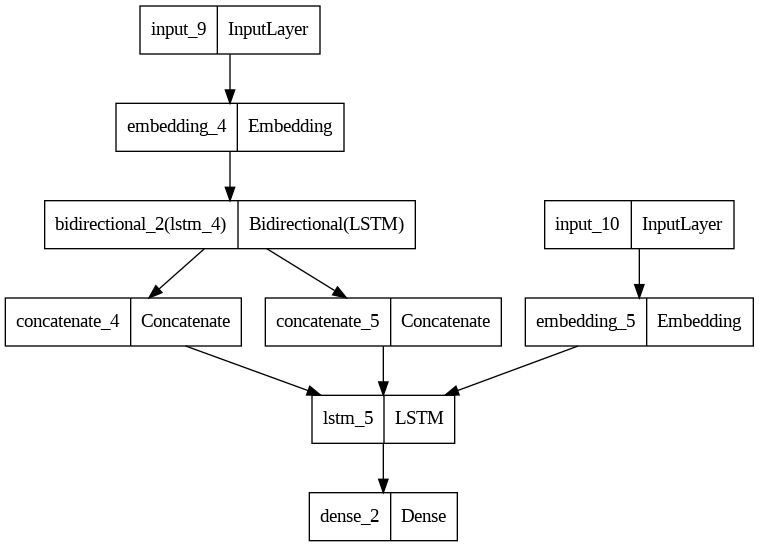

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model5)

In [ ]:
model5.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, None, 512)            756736    ['input_9[0][0]']             
                                                                                                  
 input_10 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 bidirectional_2 (Bidirecti  [(None, 512),                1574912   ['embedding_4[0][0]']         
 onal)                        (None, 256),                                                  

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
model5.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model5.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)

# callbacks_list = [checkpoint, early_stopping]

In [ ]:
# Training
encoder_input_data = X_train
decoder_input_data = y_train[:,:-1]
decoder_target_data = y_train[:,1:]

# Testing
encoder_input_test = X_test
decoder_input_test = y_test[:,:-1]
decoder_target_test= y_test[:,1:]

In [ ]:
encoder_input_data.shape

(1136, 15)

In [ ]:
decoder_input_data.shape

(1136, 16)

In [ ]:
decoder_target_data.shape

(1136, 16)

In [ ]:
history = model5.fit([encoder_input_data, decoder_input_data],decoder_target_data,
                    epochs=100,
                    batch_size=128,
                    validation_data = ([encoder_input_test, decoder_input_test],decoder_target_test),
                    callbacks= [early_stopping]
                    )

In [ ]:
loss,accuracy = model5.evaluate([encoder_input_test, decoder_input_test],decoder_target_test)
print("loss:",loss)
print("Accuracy:",accuracy)

4/4 [==============================] - 0s 13ms/step - loss: 7.3993 - accuracy: 0.3165
loss: 7.399287223815918
Accuracy: 0.3164812922477722


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the index of the maximum validation accuracy
best_val_accuracy_index = val_accuracy.index(max(val_accuracy))

# Use the index to get the corresponding training accuracy
best_train_accuracy = train_accuracy[best_val_accuracy_index]

# Print the best training and validation accuracies
print("Training Accuracy:", best_train_accuracy)
print("Validation Accuracy:", max(val_accuracy))

Training Accuracy: 0.9947892427444458
Validation Accuracy: 0.3225480318069458


In [ ]:
model5.save_weights("/content/drive/MyDrive/CSE715-Project Group 6/model.h5")

In [ ]:
import matplotlib.pyplot as plt

# Access the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Inference Model**

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras import Input, Model


encoder_model = Model(encoder_input, encoder_states)


decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c= Input(shape=(512,))
decoder_states_input= [decoder_state_input_h, decoder_state_input_c]

dec_embd2 = decoder_embd(decoder_input)

decoder_output2,state_h2, state_c2 = decoder_lstm(dec_embd2, initial_state=decoder_states_input)
deccoder_states2= [state_h2, state_c2]

decoder_output2 = decoder_dense(decoder_output2)

decoder_model = Model(
                      [decoder_input]+decoder_states_input,
                      [decoder_output2]+ deccoder_states2)

**Prediction**

In [ ]:
def get_predicted_sentence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = ans_word_index['শুরু']

    # Sampling loop for a batch of sequences

    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index==0:
          break
        else:
         # convert max index number to marathi word
         sampled_char = ans_index_word[sampled_token_index]
        # aapend it ti decoded sent
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length or find stop token.
        if (sampled_char == 'শেষ' or len(decoded_sentence) >= 30):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence[:-3]

In [ ]:
def get_response_sentence(sequence):
  sentence=""
  for i in sequence:
    if ((i != 0 and i != ans_word_index['শুরু']) and i != ans_word_index['শেষ']):
      sentence = sentence + ans_index_word[i]+' '
  return sentence

def get_question_sentence(sequence):
    sentence =''
    for i in sequence:
      if(i!=0):
        sentence = sentence + ques_index_word[i]+' '
    return sentence


# for i in range(20):
#   print("Question sentence:",get_question_sentence(X_test[i]))
#   print("Actual Response:",get_response_sentence(y_test[i]))
#   print("Predicted Response:",get_predicted_sentence(X_test[i].reshape(1,9))[:-4])
#   print("\n")

**Testing**

In [ ]:
import string

def get_user_input():
    user_input = input()
    # Perform any necessary preprocessing on the user input
    # remove multiple spaces if exists
    user_input = " ".join(user_input.split())
    translator = str.maketrans('', '', string.punctuation)
    user_input = user_input.translate(translator)

    user_input_tokens = []
    # Tokenize the input
    for token1 in user_input.split():
      # print(token1)
      for token2, word in ques_index_word.items():
        # print(f'Token: {token2}, Word: {word}')
        if word == token1:
          user_input_tokens.append(token2)

    # print(user_input_tokens)
    # user_input_sentence = ' '.join(user_input_tokens)
    ques_padded = pad_sequences([user_input_tokens], maxlen=max_ques_len, padding='post')
    return ques_padded

while(True):
  # Now use the get_user_input function to obtain user input
  user_input_sequence = get_user_input()
  # print(user_input_sequence)
  # Get the predicted response
  predicted_response = get_predicted_sentence(user_input_sequence)

  # Print the result
  # print("User Input:", user_input_sequence)
  print("Predicted Response:", predicted_response)


**Engilsh Language Support**

In [ ]:
!pip install translate

In [ ]:
from translate import Translator

def translate_text(text, source_lang, target_lang):
    translator = Translator(from_lang=source_lang, to_lang=target_lang)
    translation = translator.translate(text)
    return translation

In [ ]:
import string

def get_user_input():
    user_input = input()
    user_input = translate_text(english_text, "en", "bn")
    # Perform any necessary preprocessing on the user input
    # remove multiple spaces if exists
    user_input = " ".join(user_input.split())
    translator = str.maketrans('', '', string.punctuation)
    user_input = user_input.translate(translator)

    user_input_tokens = []
    # Tokenize the input
    for token1 in user_input.split():
      # print(token1)
      for token2, word in ques_index_word.items():
        # print(f'Token: {token2}, Word: {word}')
        if word == token1:
          user_input_tokens.append(token2)

    # print(user_input_tokens)
    # user_input_sentence = ' '.join(user_input_tokens)
    ques_padded = pad_sequences([user_input_tokens], maxlen=max_ques_len, padding='post')
    return ques_padded

while(True):
  # Now use the get_user_input function to obtain user input
  user_input_sequence = get_user_input()
  # print(user_input_sequence)
  # Get the predicted response
  predicted_response = get_predicted_sentence(user_input_sequence)

  # Print the result
  # print("User Input:", user_input_sequence)
  predicted_response = translate_text(english_text, "bn", "en")
  print("Predicted Response:", predicted_response)
